## MSDS 432 - Programming Assignment #5 Dan Avni

## Executive Summary

The purpose of this programming assignment is to provide a "real-world" demonstration of the runtime performance of four sorting algorithms: selection sort, insertion sort, quicksort and merge sort. 

The $\Theta(n)$ and $O(n)$ notation captures the average-case and worst-case performance of that these algorithms respectively:

| Algorithm  | Average-Case $\Theta(n)$  | Worst-Case $\Omega(n)$  |
|-------------|:-------------:|-----|
| Selection Sort  |$\Theta(n^2)$ | $O(n^2)$ |   
| Insertion Sort  |$\Theta(n^2)$ | $O(n^2)$ |  
| Merge Sort      |$\Theta(nlogn)$ | $O(nlogn)$ |
| Quicksort       |$\Theta(nlogn)$ | $O(n^2)$ |

We show that in practical terms the quicksort and merge sort algorithm delivered near identical runtime performance. We also look at the worst-case perofmrance to show how the table turn and merge delivering a demonstrtable superior performance. Actual implementation considerations should include memeory and access time considerations. 

Overall, both merge sort and quicksort should be considered as good options for sorting large datasets, while selection and insertion sort are only useful for east of implementation against smaller data.

## Method and Conclusions

To demonstrate the various sort algorithm average-case performance, we prepared 1000 data elements consisting of a tuple of first name, last name, and state code selected randomly with no repetition or order.

We sort the data 25 times using each of the four algorithms and measure the mean runtime performance. We show the results in both tabular and bar chart for and confirm the therotical results. 

We repeat the excercise with the data sorted in descending order to demonstrate the worst-case performance of quicksort and mergesort.

The below chart shows the avergae case results.

<img src="./runtime2.png">

## Implementation

In [174]:
#import required packages
from collections import deque
import pandas as pd
import time
import matplotlib.pyplot as plt

In [364]:
#breadth-first-search (bfs) implementation adapted and heavily modified from: 
#https://github.com/egonSchiele/grokking_algorithms/blob/master/06_breadth-first_search/python/01_breadth-first_search.py

def breadth_first_search(tree, item):
    search_queue = deque(['root'])
    # This set is how you keep track of which items you've searched before.
    searched = set()
    n = 0
    while search_queue:
        n = n + 1
        cur_item = search_queue.popleft()
        # Only search this person if you haven't already searched them.
        if cur_item not in searched:
            if cur_item == item:
                return n
            else:
                for child in tree[cur_item]:
                    search_queue.append(child)
                # Marks this item as searched
                searched.add(cur_item)
    return -1

In [365]:
#unit test
tree = {}
tree['root'] = ["danny"]
tree["danny"] = ["alice", "bob", "claire"]
tree["bob"] = ["anuj", "peggy"]
tree["alice"] = ["peggy"]
tree["claire"] = ["thom", "jonny"]
tree["anuj"] = []
tree["peggy"] = []
tree["thom"] = []
tree["jonny"] = []

breadth_first_search(tree, "peggy")

6

In [366]:
#prepare data
tree = {'root': []}

def add_tree_children(tree, item, count, level):
    if level == 6:
        return
    
    if level == 0:
        entry = tree['root']
    else:
        tree[item] = []
        entry = tree[item]

    for child in range(1, count+1):
        child_item = '{}{}{}'.format(item,level+1,child)
        entry.append(child_item)
        add_tree_children(tree, child_item, count, level+1)

add_tree_children(tree, "", 5, 0)

In [367]:
search_levels = [1, 2, 3, 4, 5]

test_results_col_names = ['search_level', 'search_item', 'search_ms', 'steps']
test_results           = pd.DataFrame(columns = test_results_col_names) 

search_prefix = ['1{}', '112{}', '11213{}', '1121314{}','112131415{}']

for level in range(1,6):
    for count in range(1,level+1):
            search_item = search_prefix[level-1].format(count)
            start   = time.time()
            steps = breadth_first_search(tree, search_item)
            if(steps == -1):
                raise Exception("item not found")
            search_ms = (time.time() - start) * 1000
            #insert the results into a new dataframe record 
            test_results.loc[len(test_results)] = [level, search_item, search_ms, steps]

In [368]:
test_results

,search_level,search_item,search_ms,steps
0,1,11,0.012875,2
1,2,1121,0.019073,7
2,2,1122,0.019550,8
3,3,112131,0.097513,32
4,3,112132,0.130177,33
5,3,112133,0.060320,34
6,4,11213141,0.222921,157
7,4,11213142,0.226021,158
8,4,11213143,0.212431,159
9,4,11213144,0.224113,160


In [369]:
test_results_mean = test_results.groupby(['search_level'], as_index=False)['search_ms'].mean()

Below is a tabular representation of the test data. It is useful as the charts fail to show the minute fluctuations in the binary search performance. To get a true read of the binary search performance we will need to run multiple tests and average the results, as well as increase the size. We should also try to execute the code in a virtualized environment where the CPU is under competition from other processes.

In [370]:
test_results_mean

,search_level,search_ms
0,1,0.012875
1,2,0.019312
2,3,0.096003
3,4,0.221372
4,5,0.826073


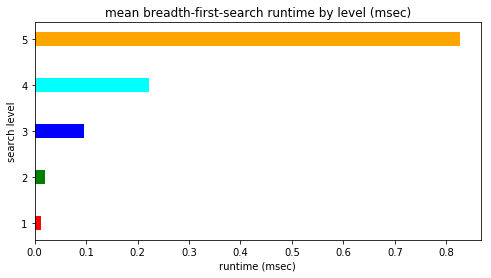

In [371]:
#plot the binary and linear search results against the data length
plt.figure(figsize=(8,4))
plt.barh(test_results_mean.search_level, test_results_mean.search_ms, height=0.3, 
         color=['red', 'green', 'blue', 'cyan','orange'])
plt.ylabel('search level')
plt.xlabel('runtime (msec)')
plt.title('mean breadth-first-search runtime by level (msec)')
plt.show()